## Bootstrapping

In [1]:
#Python version
!python --version #This assignment use the version of 3.6.0

Python 3.6.4 :: Anaconda, Inc.


In [2]:
#import library
from csv import reader #read csv file
from random import seed #gives it its first "previous" value
import operator #sort
import pandas as pd #build dataframe
import numpy as np #calculation
import seaborn as sns #plotting
import matplotlib #plotting
import matplotlib.pyplot as plt #plotting
matplotlib.style.use('ggplot') #change plotting style

In [5]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        #read file
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            #add each row in list
            dataset.append(row)
    #remove the header
    dataset.pop(0)
    return dataset

In [6]:
#read training data and change datatype from string to numbers
trainset=[[float(i) for i in a] for a in load_csv("Task1B_train.csv")]
trainset

[[1991.49615384615, 1628.75, 1678.1, 1772.8, 2443.6],
 [1991.50384615385, 1606.51, 1678.6, 1718.0, 2448.2],
 [1991.51153846154, 1618.16, 1686.6, 1723.1, 2484.7],
 [1991.51923076923, 1630.75, 1682.9, 1734.5, 2487.9],
 [1991.52692307692, 1635.47, 1697.5, 1754.0, 2510.5],
 [1991.53461538462, 1647.84, 1723.8, 1759.8, 2532.5],
 [1991.54230769231, 1629.93, 1727.4, 1758.1, 2561.0],
 [1991.55, 1624.74, 1734.0, 1763.5, 2541.5],
 [1991.55769230769, 1631.99, 1737.1, 1768.9, 2587.9],
 [1991.56538461538, 1613.42, 1723.6, 1780.1, 2579.6],
 [1991.57307692308, 1605.75, 1721.2, 1757.9, 2595.0],
 [1991.58076923077, 1619.29, 1727.2, 1754.7, 2588.8],
 [1991.58846153846, 1619.67, 1731.6, 1766.5, 2601.7],
 [1991.59615384615, 1613.98, 1716.9, 1759.5, 2573.3],
 [1991.60384615385, 1630.37, 1723.0, 1789.5, 2600.6],
 [1991.61153846154, 1626.55, 1722.1, 1780.4, 2569.4],
 [1991.61923076923, 1650.06, 1733.6, 1820.3, 2608.8],
 [1991.62692307692, 1653.6, 1726.2, 1820.3, 2621.0],
 [1991.63461538462, 1524.28, 1630.6, 1

In [7]:
#read test data and change datatype from string to numbers
testset=[[float(i) for i in a] for a in load_csv("Task1B_test.csv")]
testset

[[1991.5, 1613.63, 1688.5, 1750.5, 2460.2],
 [1991.50769230769, 1621.04, 1684.1, 1708.1, 2470.4],
 [1991.51538461538, 1610.61, 1671.6, 1714.3, 2466.8],
 [1991.52307692308, 1640.17, 1703.6, 1757.4, 2508.4],
 [1991.53076923077, 1645.89, 1716.3, 1754.3, 2497.4],
 [1991.53846153846, 1638.35, 1730.5, 1755.5, 2556.8],
 [1991.54615384615, 1621.49, 1733.3, 1757.5, 2547.3],
 [1991.55384615385, 1627.63, 1728.3, 1762.8, 2558.5],
 [1991.56153846154, 1621.18, 1723.1, 1778.1, 2580.5],
 [1991.56923076923, 1604.95, 1719.0, 1767.7, 2589.3],
 [1991.57692307692, 1616.67, 1725.3, 1756.6, 2595.6],
 [1991.58461538462, 1620.49, 1727.2, 1766.8, 2591.7],
 [1991.59230769231, 1623.07, 1724.1, 1762.2, 2585.4],
 [1991.6, 1631.87, 1723.4, 1782.4, 2597.4],
 [1991.60769230769, 1633.47, 1728.4, 1783.5, 2570.6],
 [1991.61538461538, 1650.43, 1724.5, 1808.8, 2584.9],
 [1991.62307692308, 1654.11, 1739.0, 1820.3, 2617.2],
 [1991.63076923077, 1501.82, 1587.4, 1687.5, 2540.5],
 [1991.63846153846, 1603.65, 1685.5, 1792.9, 260

### Step I: 
Modify the code in Activity 2 to handle bootstrapping for KNN regression.

In [8]:
#calculate euclidean distance
def euclideanDistance(x,y):
    x=np.array(x)
    y=np.array(y)
    dist = np.sqrt(np.sum((x-y)**2))
    return dist

In [9]:
#calculate average value
def average_value(value):
    length=len(value)
    average=sum(value)/length
    return average

In [10]:
#modify KNN regression
def knn(train_data, train_label, test_data, k=3):
    distances = []
    test_label=[]
    neighbor_value=[]
    for each in range(len(test_data)):
        for x in range(len(train_data)):
            dist = euclideanDistance((test_data[each]), (train_data[x]))
            distances.append((train_data[x], dist))
        #sort all of distances
        distances.sort(key=operator.itemgetter(1))
        #find first k values(only need to change is the data from 2 dimention to 5)
        for num in distances[:k]:
            neighbor_value.append(num[0][4])
        #take average of values
        average_distance=average_value(neighbor_value)
        test_label.append(average_distance)
        neighbor_value=[]
        distances=[]
    return test_label

### Step II: 
Now create a boxplot where the x-axis is K, and the y-axis is the average error (and the uncertainty around it) corresponding to each K.


In [11]:
def bootstrap_resample(original_size, sample_size, times):
    #sampling with replacement
    index=pd.DataFrame(np.random.randint(0,original_size,size=(times, sample_size)))
    #return index
    return index

In [12]:
#all parameters
K=20    #K for KNN
L=100   #number of datasets
N=25    #size of datasets

In [13]:
#extract training set labels
train_label=[]
for each in trainset:
    train_label.append(each[4])
#extract test labels
real_test_label=[i[4] for i in testset]

In [14]:
#build bootstraing dataframe which stores index for knn testing
np.random.seed(1)
bootstrapping=bootstrap_resample(len(trainset), N, L)
print(bootstrapping)

     0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0    37  235  908   72  767  905  715  645  847  144 ...   281  178  276  254   
1   668  925  398  562  580  215  753  503  478  864 ...   829  534  313  513   
2   627  431  633  456  542   71  387  454  917  561 ...   588   26  820  336   
3   196   25  367  738  471  903  282  665  616   22 ...   356  155  313  595   
4   655  751   87  793  243  348  586  190  302  928 ...   845  771  896  253   
5   588  149  715  263   77  712   75  332   43  532 ...   569  752  508  210   
6   903  889  152  714  476  660  416  140  193  606 ...   865  130  492  732   
7   850  470  198  706  327  176  566   15  901  401 ...   909  626  609  693   
8   729  405  231   96  505   25  497  910  141  212 ...   911  536  137  450   
9    21  296   77  219  689  369  303  461  424  462 ...   557  451  884  322   
10  477  545  642  468  595   48  822  288  253  668 ...   330  136  109  611   
11  832  620  211   24  113 

#### testing

In [13]:
train_list=[]
test_error=[]
error_list=[]

#change K=1 to 20
for k in range(1,21):
    for l in range(len(bootstrapping)):
        #for each bootstrapping
        for each in bootstrapping.iloc[l]:
            train_list.append(trainset[each])
        #test KNN
        knn_set=knn(train_list, train_label, testset, k)
        #calculate errors
        errors=[knn_set_i - real_test_label_i for knn_set_i, real_test_label_i in zip(knn_set, real_test_label)]
        li=[abs(number) for number in errors]
        average_error=np.mean(li)
        test_error.append(average_error)
        train_list=[]
    error_list+=test_error
    test_error=[]

In [14]:
#put K in the list for building dataframe in next step
k_list=[]
for i in range(1,21):
    n_times=[str(i)]*L
    k_list+=n_times

In [15]:
#building a datframe for plotting
df_q3 = pd.DataFrame({'K': k_list,
                      'L': [i for i in range(1,L+1)]*K,
                      'type':[str("test")]*L*K,
                      'Average error':error_list})

df_q3.head()

,K,L,miss,type
0,1,1,83.211183,test
1,1,2,84.778495,test
2,1,3,107.132688,test
3,1,4,100.635591,test
4,1,5,77.378495,test


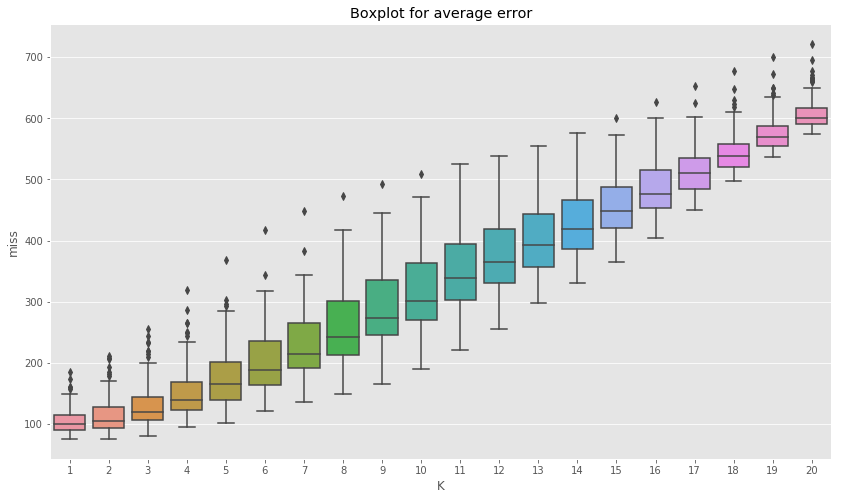

In [16]:
#plotting
#set figure size
plt.figure(figsize=(14,8))
# Determine the order of boxes
df_q3.K=[int(i) for i in df_q3.K]
order1 = sorted(df_q3.K.unique())
#draw boxplot
sns.boxplot(x="K", y="Average error", data=df_q3, order=order1)
#set title
plt.title('Boxplot for average error')
plt.show()
#plt.savefig('myfig3.png', dpi=1000)

### Summary:

Test error is increasing with the the number of K increases. 

We can see that when K is small, it fits model well, error and uncertainty are small. This means the model will be really close to training data. And that's why when K is small, it would be overfitting.

But, increasing k would reduce over-fitting.

We can see that after K=11, once k is too large, then we may end up smoothing things out too much and eliminating some important details in the distribution. The smoothing effect would intuited results in decreasing variance which will effect overall performance negatively.

In sum, we need to choose K large enough to avoid overfitting, but small enough to avoid oversimplifying the distribution. This is similar to the trade-off we faced when deciding how many parameters to include in our regression curve

### Step III: 
Create a boxplot where the x-axis is ‘times’, and the y-axis is the average error (and the uncertainty around it) corresponding to each value of ‘times’. 

For this question, it would use the training and test set that already loaded from previous questions.

In [17]:
K=10     #K for KNN, neihborhood size
#L=100    #number of datasets
N=25    #size of datasets

In [18]:
train_list=[]
test_error=[]
error_list=[]
real_test_label=[i[4] for i in testset]

#change number of subsets=10,20,30,...200
for l in range(10,210,10):
    #np.random.seed(1)
    #resampling with bootstramping
    bootstrapping=bootstrap_resample(len(trainset), N, l)
    for l in range(len(bootstrapping)):
        for each in bootstrapping.iloc[l]:
            train_list.append(trainset[each])
        #calculate knn model
        knn_set=knn(train_list, train_label, testset, 10)
        #calculate errors for knn model
        errors=[knn_set_i - real_test_label_i for knn_set_i, real_test_label_i in zip(knn_set, real_test_label)]
        #take absolute values
        li=[abs(number) for number in errors]
        #take average of error list
        average_error=np.mean(li)
        test_error.append(average_error)
        train_list=[]
    error_list+=test_error
    test_error=[]
               
#print(error_list)

In [22]:
#make a column for number of subsets 
L_list=[]
for i in range(10,210,10):
    n_times=[str(i)]*i
    L_list+=n_times

In [23]:
#make a column for K(neighborhood size)
row_list=[]
for i in range(10,210,10):
    for k in range(1,i+1):
        row_list.append(k)

In [24]:
#building a dataframe
df_q3_2 = pd.DataFrame({'L': L_list,
                        'rows': row_list,
                        'type':[str("test")]*2100,
                        'miss':error_list})

df_q3_2

,L,miss,rows,type
0,10,255.099258,1,test
1,10,322.626108,2,test
2,10,389.841462,3,test
3,10,231.121688,4,test
4,10,321.633409,5,test
5,10,339.329581,6,test
6,10,244.926785,7,test
7,10,206.279720,8,test
8,10,298.882237,9,test
9,10,442.591710,10,test


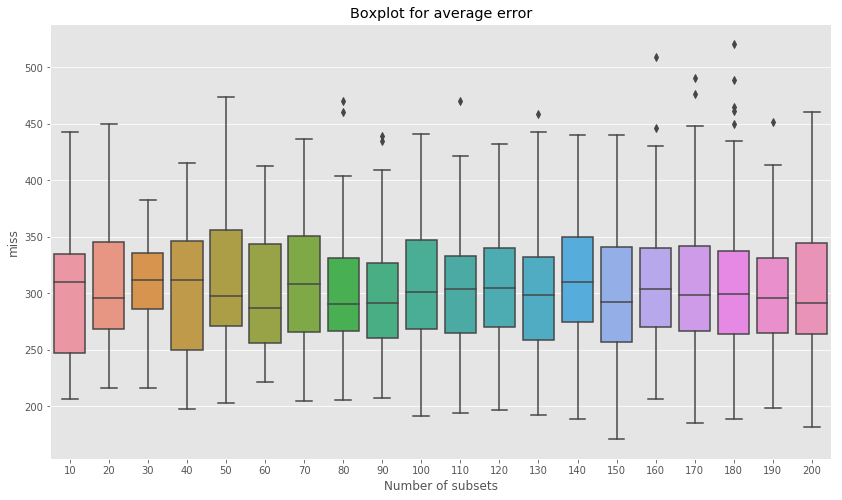

In [25]:
#set figure size
plt.figure(figsize=(14,8))
# Determine the order of boxes
df_q3_2.L=[int(i) for i in df_q3_2.L]
order1 = sorted(df_q3_2.L.unique())
#draw boxplot
sns.boxplot(x="L", y="miss", data=df_q3_2, order=order1)
#set title
plt.title('Boxplot for average error')
plt.xlabel("Number of subsets")
plt.show()
#plt.savefig('myfig4.png', dpi=1000)

#### Summary:

We can see from plotting, the result shows the errors are randomly with the number of subsets increasing. It might indicate that the number of subsets has no influence with testing errors. And we can also see that with the number of subset increaseing, the unicertainty is randomly as well but there are more outliers in the large number of subsets than in small, which may because the higher the subsets of the data points, the less reliable the KNN algorithm becomes. This is attributed to the fact that dissimilarity measure is normally computed as a basic euclidean distance measure which suffers from curse of dimensionality. This mainly happens because the euclidean score doesn't weigh each feature, all features, relevant or irrelevant, are equally weighted. This means irrelevant features will interfere with the the model. Thus with higher dimensional vectors the KNN approach is likely to suffer from the curse of dimensionality. With that said use KNN mostly with low dimensional feature vectors.